In [22]:
import io

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pulse2percept as p2p
from PIL import Image
%matplotlib inline

In [259]:
df = pd.read_parquet("../datasets/MNIST/train.parquet")
df.shape

(60000, 2)

In [260]:
test = pd.read_parquet("../datasets/MNIST/test.parquet")
test.shape

(10000, 2)

In [4]:
print(df)

                                                   image  label
0      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      9
1      {'bytes': b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      0
2      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      0
3      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      3
4      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      0
...                                                  ...    ...
59995  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      5
59996  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      1
59997  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      3
59998  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      0
59999  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      5

[60000 rows x 2 columns]


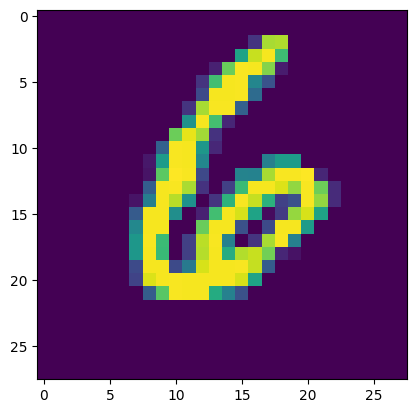

In [261]:
%matplotlib inline
image = Image.open(io.BytesIO(df["image"].iloc[13]['bytes']))
plt.imshow(image)

In [264]:
np.max(np.array(image))

255

In [238]:
img = np.array(image)
img.shape

(28, 28)

<Axes: >

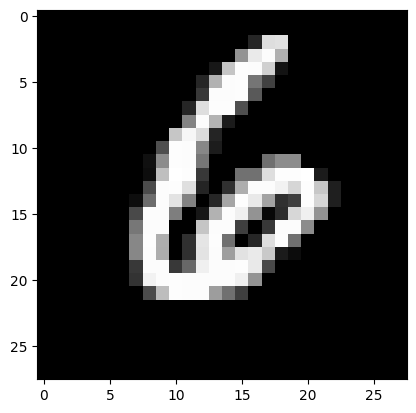

In [239]:
stim = p2p.stimuli.ImageStimulus(img)
stim.plot()

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

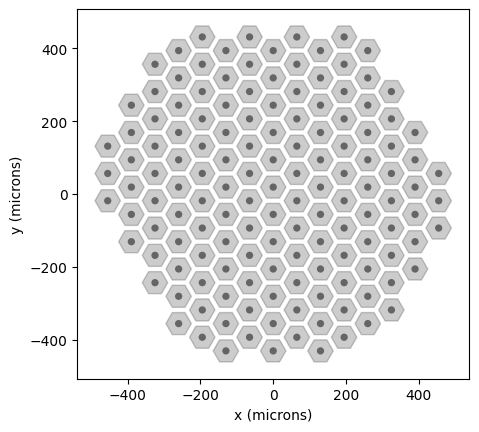

In [208]:
implant = p2p.implants.PRIMA75()
# implant = p2p.implants.ArgusII()
implant.plot()

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

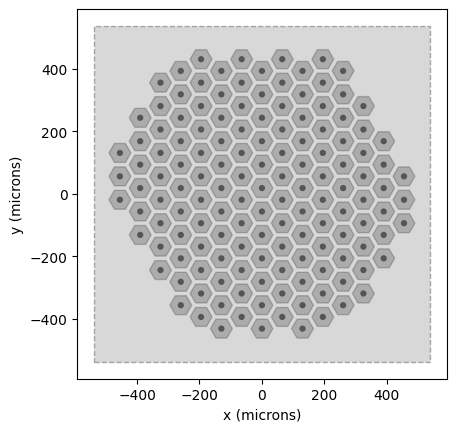

In [242]:
# model = p2p.models.AxonMapModel(xrange=(-10, 10), yrange=(-6, 6), xystep=(0.7, 0.4), rho=300, axlambda=200)
model = p2p.models.ScoreboardModel(xrange=(-2, 2), yrange=(-2, 2), xystep=0.15, rho=130)
model.build()
model.plot()
implant.plot()

In [234]:
stim.shape

(784, 1)

In [243]:
implant.stim = stim.resize(implant.shape)
percept = model.predict_percept(implant)
frame = percept.max(axis='frames')
frame

array([[0.   , 0.   , 0.001, ..., 0.026, 0.011, 0.005],
       [0.   , 0.001, 0.003, ..., 0.038, 0.017, 0.007],
       [0.001, 0.002, 0.005, ..., 0.052, 0.023, 0.009],
       ...,
       [0.008, 0.019, 0.038, ..., 0.009, 0.004, 0.002],
       [0.004, 0.01 , 0.021, ..., 0.004, 0.002, 0.001],
       [0.002, 0.005, 0.01 , ..., 0.002, 0.001, 0.   ]], dtype=float32)

In [218]:
print(percept.shape)

(81, 81, 1)


In [219]:
np.max(frame)

7.4878

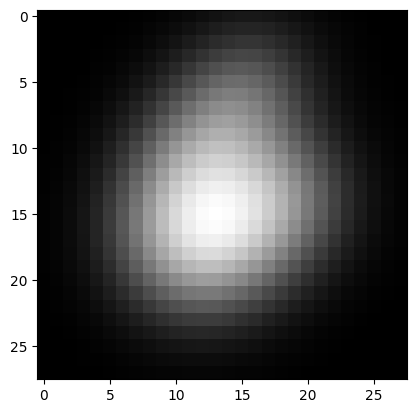

: 

In [244]:
plt.imshow(frame, cmap='gray')

0.7204643

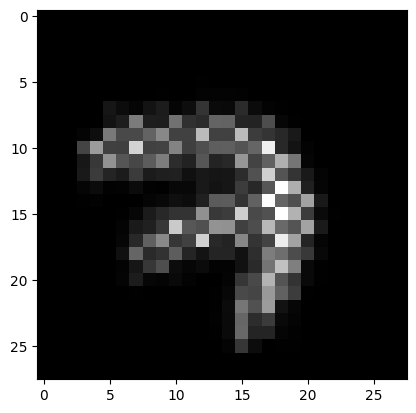

In [26]:
file = np.load('Out/prima75scoreboard/traindata.npz')
plt.imshow(file['data'][5000], cmap='grey')
np.max(file['data'][5000])

In [28]:
print(file['data'].shape)

(60000, 28, 28)


In [29]:
file = np.load('Out/prima75scoreboard/trainlabels.npz')
print(file['data'].shape)

(60000,)


In [23]:
def compare_npz_files(file1, file2, tol=1e-8):
    # Load the .npz files
    data1 = np.load(file1)
    data2 = np.load(file2)

    # Check if the keys are the same
    if set(data1.keys()) != set(data2.keys()):
        print("The files have different keys.")
        return False

    # Compare each array
    for key in data1.keys():
        array1 = data1[key]
        array2 = data2[key]

        if array1.dtype != array2.dtype:
            print(f"Arrays '{key}' have different dtypes.")
            print(array1.dtype)
            print(array2.dtype)
            return False

        if array1.shape != array2.shape:
            print(f"Arrays '{key}' have different shapes.")
            print(array1.shape)
            print(array2.shape)
            return False

        if not np.allclose(array1, array2, atol=tol):
            print(f"Arrays '{key}' are not equal within tolerance.")
            return False

    print("The files contain the same data.")
    return True

# Example usage
file1 = 'Out/prima75scoreboard/traindata.npz'
file2 = 'Out/traindata.npz'
compare_npz_files(file1, file2)

The files contain the same data.


True

<Axes: >

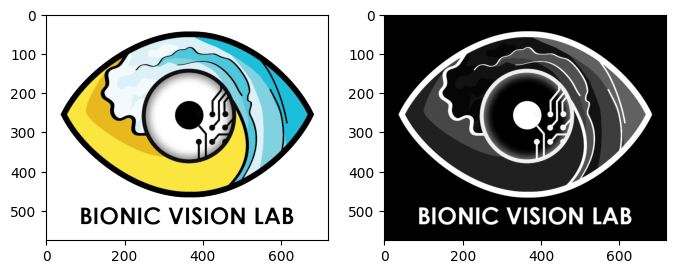

In [3]:
logo = p2p.stimuli.LogoBVL()
logo_gray = logo.invert().rgb2gray()

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
logo.plot(ax=ax1)
logo_gray.plot(ax=ax2)

In [4]:
model = p2p.models.ScoreboardModel(xrange=(-7, 7), yrange=(-7, 7), xystep=0.1)
model.build()

from pulse2percept.implants import AlphaAMS
implant = AlphaAMS()

implant.shape

(40, 40)

In [14]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Construct the path to the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add the parent directory to sys.path
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import image_preprocessor

ip = image_preprocessor.ImagePreprocessor()
image = ip.process_image(logo)
image == logo

True

3.3302615

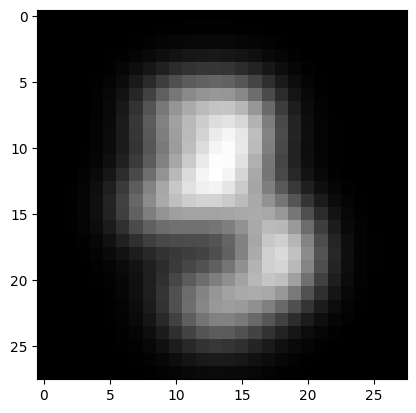

In [17]:
file = np.load('../Out/prima75scoreboard4/testdata.npz')
plt.imshow(file['data'][5000], cmap='grey')
np.max(file['data'][5000])

3.305985

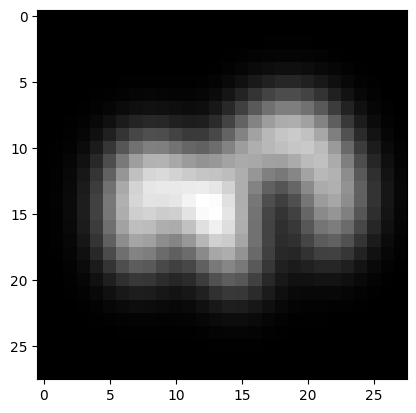

In [20]:
file = np.load('../Out/testdata.npz')
plt.imshow(file['data'][5000], cmap='grey')
np.max(file['data'][5000])

In [223]:
import torchvision
import torchvision.transforms as transforms

# Define transformations to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),   
    transforms.Grayscale(num_output_channels=3),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the testing dataset
testset = torchvision.datasets.CIFAR10(root='../datasets/cifar10/', train=False, download=False, transform=transform)

In [227]:
image, label = testset[0]
image.numpy().transpose((1, 2, 0)).shape

(32, 32, 3)

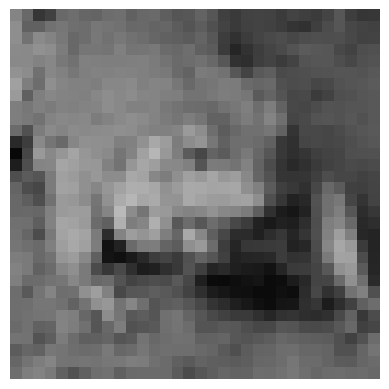

In [205]:
plt.imshow(testset[5][0].permute(1, 2, 0))
plt.axis('off')  # Hide axes
plt.show()

<Axes: >

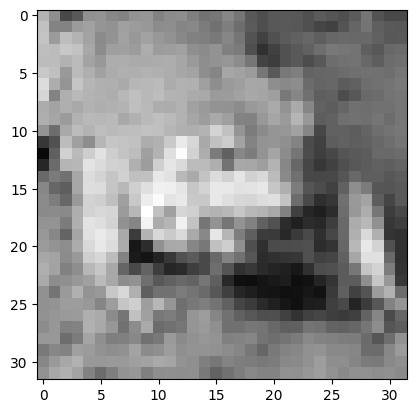

In [177]:
img = testset[5][0].numpy().transpose((1, 2, 0))
stim = p2p.stimuli.ImageStimulus(img).rgb2gray()
stim
stim.plot()

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

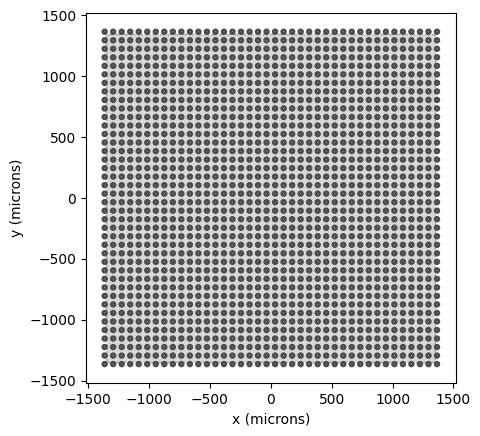

In [195]:
model = p2p.models.ScoreboardModel(xrange=(-5, 5), yrange=(-5, 5), xystep=0.32, rho=70)
implant = p2p.implants.AlphaAMS(x=0)
model.build()
model.plot()
implant.plot()

(32, 32)

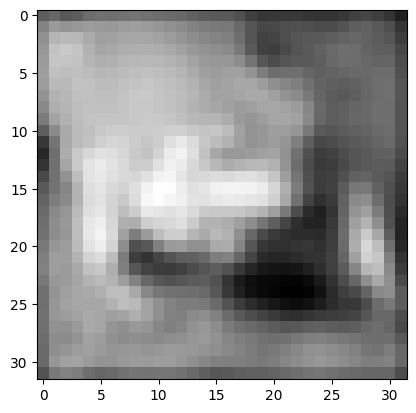

In [208]:
implant.stim = stim.resize(implant.shape)
percept = model.predict_percept(implant)
frame = percept.max(axis='frames')
plt.imshow(frame, cmap='gray')
frame.shape

In [211]:
gray = (frame - np.min(frame)) / (np.max(frame) - np.min(frame))
gray

array([[0.364, 0.405, 0.345, ..., 0.245, 0.202, 0.126],
       [0.515, 0.604, 0.578, ..., 0.351, 0.307, 0.211],
       [0.564, 0.709, 0.723, ..., 0.363, 0.34 , 0.245],
       ...,
       [0.412, 0.558, 0.583, ..., 0.453, 0.488, 0.405],
       [0.415, 0.588, 0.636, ..., 0.493, 0.514, 0.408],
       [0.325, 0.474, 0.51 , ..., 0.4  , 0.399, 0.298]], dtype=float32)

30


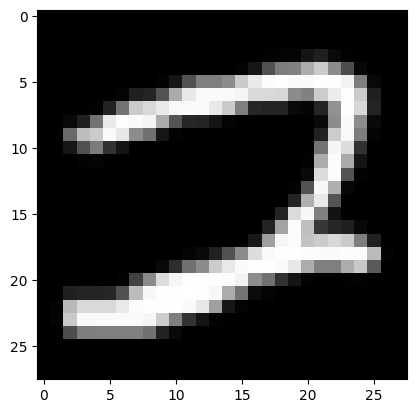

In [258]:
import pickle

with open('../datasets/EMNIST/emnist_test.pkl', 'rb') as file:
    data = pickle.load(file)

# print(type(data['data']))
# print(data['labels'].shape)

img = data['data'][0]
# print(np.max(img))
print(data['labels'][0])
plt.imshow(img, cmap='gray')

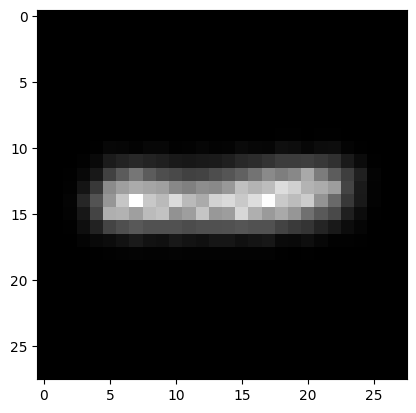

In [253]:

model = p2p.models.ScoreboardModel(xrange=(-2, 2), yrange=(-2, 2), xystep=0.15, rho=30)
implant = p2p.implants.PRIMA75()
model.build()

stim = p2p.stimuli.ImageStimulus(img)
implant.stim = stim.resize(implant.shape)
percept = model.predict_percept(implant)

frame = percept.max(axis='frames')
frame = (frame - np.min(frame)) / (np.max(frame) - np.min(frame))
plt.imshow(frame, cmap='gray')